In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv('Final_Train1.csv')
test_df=pd.read_csv('Final_Test.csv')

In [3]:
df=train_df.append(test_df)

In [4]:
#by the help of append fuction i am adding the both data of train and test

In [5]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0
...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
dtypes: float64(1), object(6)
memory usage: 496.8+ KB


In [7]:
#from this i observed that i have to change the datatype of every columns except the fees column

In [8]:
df.shape

(7948, 7)

In [9]:
df.dtypes

Qualification          object
Experience             object
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
dtype: object

In [10]:
df.columns 

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [11]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [13]:
# I am using the Label Encoder to change the datatype of the particular columns so that i can work futher 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Qualification']=le.fit_transform(df['Qualification'])
df['Experience']=le.fit_transform(df['Experience'])
df['Profile']=le.fit_transform(df['Profile'])



In [14]:
df = df.astype(str) 
print(df.dtypes) 

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                  object
dtype: object


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Qualification']=le.fit_transform(df['Qualification'])
df['Experience']=le.fit_transform(df['Experience'])
df['Rating']=le.fit_transform(df['Rating'])
df['Place']=le.fit_transform(df['Place'])
df['Profile']=le.fit_transform(df['Profile'])
df['Miscellaneous_Info']=le.fit_transform(df['Miscellaneous_Info'])
df['Fees']=le.fit_transform(df['Fees'])

In [16]:
df.dtypes

Qualification         int32
Experience            int32
Rating                int32
Place                 int32
Profile               int32
Miscellaneous_Info    int32
Fees                  int32
dtype: object

In [17]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000
mean,891.842350,30.148465,43.666457,453.344112,2.458606,2901.943885,20.364117
std,493.184359,22.063137,16.643974,282.194640,1.657217,1270.294657,14.424701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,522.750000,10.000000,46.000000,214.750000,1.000000,1961.750000,7.000000
50%,787.500000,26.000000,52.000000,449.000000,2.000000,3559.500000,19.000000
75%,1237.000000,56.000000,52.000000,687.000000,4.000000,3974.000000,39.250000
max,1800.000000,63.000000,52.000000,948.000000,5.000000,3980.000000,40.000000


In [18]:
#1) The mean is more than the median 50th percentile in columns. 
#2) Apart from  Miscellaneous_Info and Fees these two have higher median compare to the mean.
#3)Their is large difference in 75% and max in Qualification,Experience ,Place only

In [19]:
df.Qualification.unique()

array([1237, 1713,  494, ...,  704,  467,  385])

In [20]:
df.Qualification.value_counts()

757     632
1163    627
668     624
1523    441
409     280
       ... 
898       1
902       1
914       1
918       1
0         1
Name: Qualification, Length: 1801, dtype: int64

In [21]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [22]:
#Their is no null value present in the dataset

In [23]:
dfcor=df.corr()
dfcor

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
Qualification,1.000000,-0.020251,0.001392,-0.015357,0.137298,0.050009,-0.031222
Experience,-0.020251,1.000000,-0.049023,-0.016836,-0.054012,-0.019836,-0.004304
Rating,0.001392,-0.049023,1.000000,0.030762,0.054146,0.492431,-0.025352
Place,-0.015357,-0.016836,0.030762,1.000000,0.011357,0.050714,-0.042551
Profile,0.137298,-0.054012,0.054146,0.011357,1.000000,0.009125,0.081711
Miscellaneous_Info,0.050009,-0.019836,0.492431,0.050714,0.009125,1.000000,-0.085849
Fees,-0.031222,-0.004304,-0.025352,-0.042551,0.081711,-0.085849,1.000000


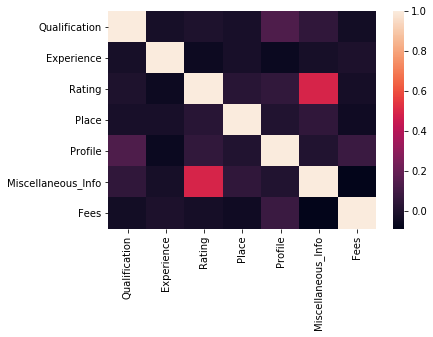

In [24]:
sns.heatmap(dfcor)

In [25]:
#From the above dataset it shows the negative correlation 

In [26]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

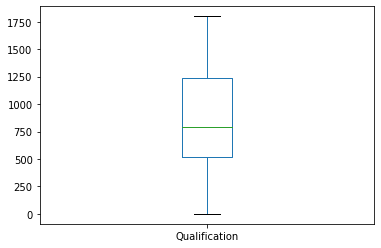

In [27]:
df['Qualification'].plot.box()

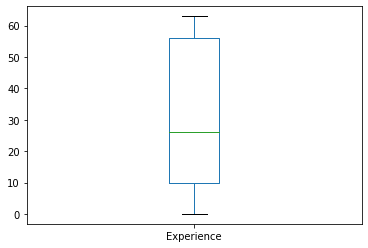

In [28]:
df['Experience'].plot.box()

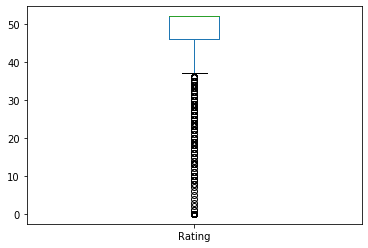

In [29]:
df['Rating'].plot.box()

In [30]:
collist=df.columns.values
ncol=7
nrows=10

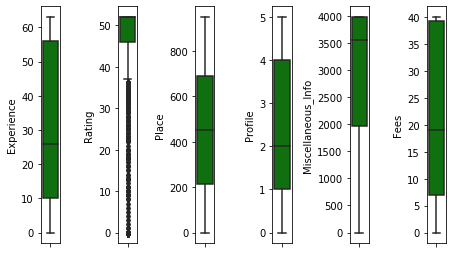

In [31]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [32]:
#from the above picture i can say that their are outliers present in the rating column

lets check skeweness of the data

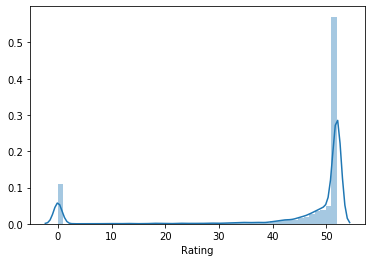

In [33]:
sns.distplot(df['Rating'])

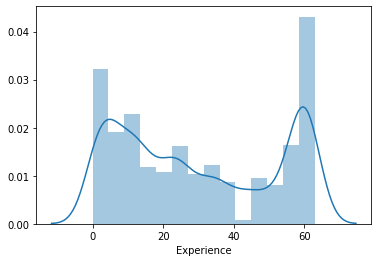

In [34]:
sns.distplot(df['Experience'])

In [35]:
#From the above two graph i can say that data is not normally distributed

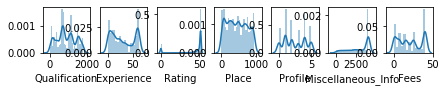

In [36]:
plt.figure(figsize=(7,10))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

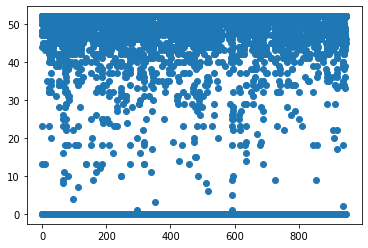

In [37]:
plt.scatter(df['Place'],df['Rating'])

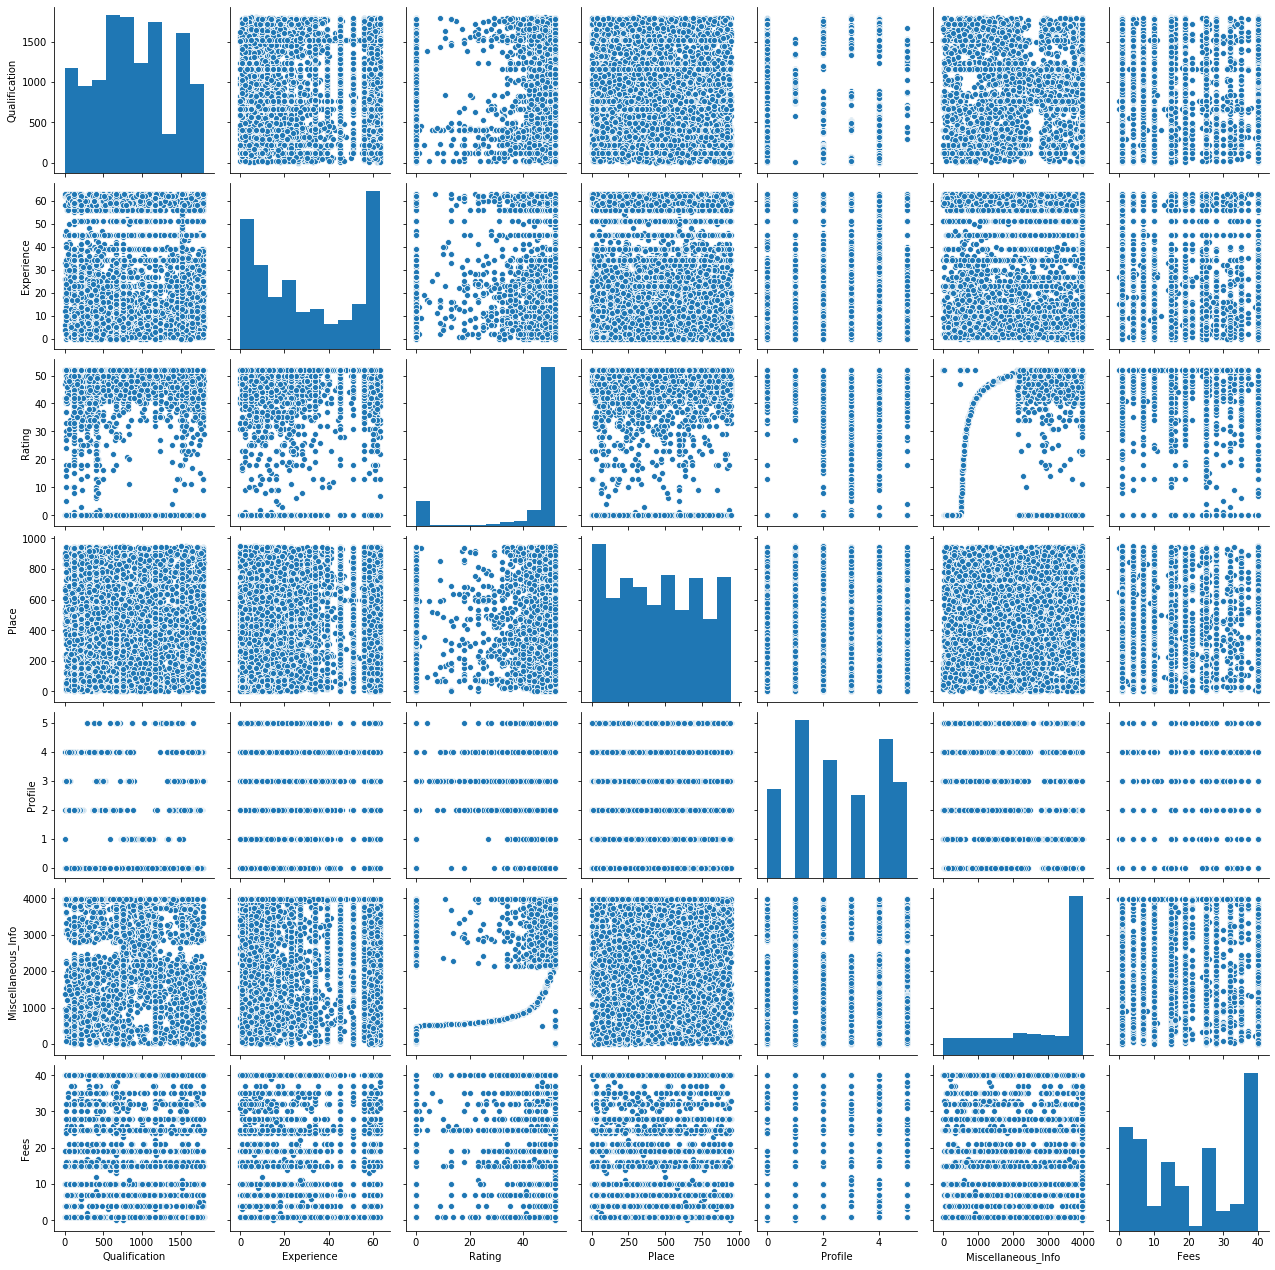

In [38]:
sns.pairplot(df)

In [39]:
#Removing Outlier

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.69989925, 1.00393059, 2.62372463, ..., 1.53362797, 2.13660241,
        1.34251203],
       [1.66511629, 0.32402077, 0.38055464, ..., 1.4836687 , 0.74864813,
        0.30256372],
       [0.80673155, 1.35309011, 0.50072581, ..., 0.3267093 , 0.84399596,
        0.37189361],
       ...,
       [1.02775814, 1.35309011, 0.50072581, ..., 0.93016863, 0.84399596,
        1.36135357],
       [0.27342885, 0.32402077, 0.38055464, ..., 0.88020937, 0.52830131,
        1.36135357],
       [1.55903306, 1.30776279, 0.50072581, ..., 0.27675003, 2.26492717,
        1.36135357]])

In [41]:
threshold=3
print(np.where(z<3))

(array([   0,    0,    0, ..., 7947, 7947, 7947], dtype=int64), array([0, 1, 2, ..., 4, 5, 6], dtype=int64))


In [42]:
df_new=df[(z<3).all(axis=1)]

In [43]:
df.shape

(7948, 7)

In [44]:
df_new.shape

(7948, 7)

In [45]:
df.skew()

Qualification         0.087510
Experience            0.199368
Rating               -2.060924
Place                 0.104400
Profile               0.088789
Miscellaneous_Info   -0.823068
Fees                  0.120934
dtype: float64

In [46]:
#From the above it shows that their is no skewness present in the dataset.

In [47]:
#No saperating the x and y for prediction of recovered 

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_new)
x=pd.DataFrame(x,columns=df_new.columns)

In [49]:
x
x.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,0.699899,-1.003931,-2.623725,-0.447748,1.533628,-2.136602,-1.342512
1,1.665116,-0.324021,0.380555,1.710473,-1.483669,-0.748648,-0.302564
2,-0.806732,1.353090,0.500726,0.161799,0.326709,0.843996,-0.371894
3,0.882398,-0.324021,0.500726,-1.344349,-1.483669,-0.474679,-0.718543
4,-0.453900,-1.185240,-2.623725,-0.298905,-1.483669,-2.016150,-0.718543


In [50]:
y=df.iloc[:,-1]
y.head()

0     1
1    16
2    15
3    10
4    10
Name: Fees, dtype: int32

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([ 1, 16, 15, ..., 40, 40, 40], dtype=int64)

In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corressponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [53]:
#Lets use Linear regression and check max r2 score corressponding to different random state
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to  42  is  1.0
r2 score corresponding to  43  is  1.0
r2 score corresponding to  44  is  1.0
r2 score corresponding to  45  is  1.0
r2 score corresponding to  46  is  1.0
r2 score corresponding to  47  is  1.0
r2 score corresponding to  48  is  1.0
r2 score corresponding to  49  is  1.0
r2 score corresponding to  50  is  1.0
r2 score corresponding to  51  is  1.0
r2 score corresponding to  52  is  1.0
r2 score corresponding to  53  is  1.0
r2 score corresponding to  54  is  1.0
r2 score corresponding to  55  is  1.0
r2 score corresponding to  56  is  1.0
r2 score corresponding to  57  is  1.0
r2 score corresponding to  58  is  1.0
r2 score corresponding to  59  is  1.0
r2 score corresponding to  60  is  1.0
r2 score corresponding to  61  is  1.0
r2 score corresponding to  62  is  1.0
r2 score corresponding to  63  is  1.0
r2 score corresponding to  64  is  1.0
r2 score corresponding to  65  is  1.0
r2 score corresponding to  66  is  1.0
r2 score corresponding to

In [54]:
#Lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors, cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 9}

In [55]:
#Lets use KNN regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=9)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42  is  0.9790719770288353
r2 score corresponding to  43  is  0.9783213522789522
r2 score corresponding to  44  is  0.9767248275853443
r2 score corresponding to  45  is  0.9773740746664676
r2 score corresponding to  46  is  0.9779015651171875
r2 score corresponding to  47  is  0.978733903117749
r2 score corresponding to  48  is  0.9783553294363232
r2 score corresponding to  49  is  0.9791604951736137
r2 score corresponding to  50  is  0.9772644083906069
r2 score corresponding to  51  is  0.9781452394382335
r2 score corresponding to  52  is  0.9754132087138865
r2 score corresponding to  53  is  0.9787580048743866
r2 score corresponding to  54  is  0.9753993218957371
r2 score corresponding to  55  is  0.9780502465516808
r2 score corresponding to  56  is  0.9786420671536217
r2 score corresponding to  57  is  0.9776679262582948
r2 score corresponding to  58  is  0.9785456429317722
r2 score corresponding to  59  is  0.9785443749357476
r2 score corresponding to  60

In [56]:
#Lets check the mean r2 score of both LinearRegression model and knn regression
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression :",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
#Based on below output Linear Regression is performing well

Mean r2 score for Linear Regression : 0.8
standard deviation in r2 score for Linear Regression: 0.4

Mean r2 score for KNN Regression: 0.763859120619945
standard deviation in r2 score for KNN Regression:  0.38215050377165694


In [57]:
#Lets check laso Regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [58]:
#Lets check max_r2 score whenwe use lasso
lsreg=Lasso(alpha=0.001)
r_stat=maxr2_score(lsreg,x,y)

r2 score corresponding to  42  is  0.9999999952692697
r2 score corresponding to  43  is  0.9999999952204263
r2 score corresponding to  44  is  0.9999999951452717
r2 score corresponding to  45  is  0.9999999951196229
r2 score corresponding to  46  is  0.9999999951147532
r2 score corresponding to  47  is  0.9999999951396
r2 score corresponding to  48  is  0.999999995159244
r2 score corresponding to  49  is  0.9999999951216614
r2 score corresponding to  50  is  0.9999999951201052
r2 score corresponding to  51  is  0.9999999952318188
r2 score corresponding to  52  is  0.9999999952518897
r2 score corresponding to  53  is  0.9999999952085147
r2 score corresponding to  54  is  0.9999999952058009
r2 score corresponding to  55  is  0.999999995238668
r2 score corresponding to  56  is  0.9999999951889652
r2 score corresponding to  57  is  0.9999999951231326
r2 score corresponding to  58  is  0.9999999951845457
r2 score corresponding to  59  is  0.9999999951795749
r2 score corresponding to  60  is

In [59]:
#Lets use cross val score with lasso
print("Mean r2_score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
#Based on below output i can say lasso performed just like linear regression

Mean r2_score for Lasso Regression:  0.7999999948188808
standard deviation in r2 score for Lasso Regression:  0.3999999974094404


In [60]:
#Now we will try to use gradient boosting technique
#for getting best set of parameters we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000,]}
clr = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [61]:
#Now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=500)
print("Mean r2 score for gradiant boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for gradiant boosting Regression:  0.36167215966456523
standard deviation in r2 score for gradient boosting Regression:  0.2033886911348772


In [62]:
#Lets check maximum r2_score corresponding to this
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to  42  is  0.6299497276971553
r2 score corresponding to  43  is  0.6301311347719052
r2 score corresponding to  44  is  0.6302968460660843
r2 score corresponding to  45  is  0.6298380552345979
r2 score corresponding to  46  is  0.630105986188246
r2 score corresponding to  47  is  0.6300995063199458
r2 score corresponding to  48  is  0.6300878346682908
r2 score corresponding to  49  is  0.6302564820787434
r2 score corresponding to  50  is  0.6301502232347288
r2 score corresponding to  51  is  0.6297144960107208
r2 score corresponding to  52  is  0.6303339836912112
r2 score corresponding to  53  is  0.629843301115445
r2 score corresponding to  54  is  0.6299926245173995
r2 score corresponding to  55  is  0.6302445406087681
r2 score corresponding to  56  is  0.6303813826307156
r2 score corresponding to  57  is  0.630044116880673
r2 score corresponding to  58  is  0.6294820082493588
r2 score corresponding to  59  is  0.6298124325117826
r2 score corresponding to  60  

In [63]:
#Now lets use the ada boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lreg,lsreg,DecisionTreeRegressor()]}
clf = GridSearchCV(ada_reg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 100}

In [64]:
ada_reg=AdaBoostRegressor(base_estimator=lsreg,learning_rate=0.001,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").std())


Mean r2 score for ada boosting Regression:  0.7999999947229582
standard deviation in r2 score for ada boosting Regression:  0.3999999974547949


In [65]:
#Lets check maximum r2_score corresponding to this
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to  42  is  0.9999999952165853
r2 score corresponding to  43  is  0.9999999950604321
r2 score corresponding to  44  is  0.9999999951437153
r2 score corresponding to  45  is  0.9999999950990898
r2 score corresponding to  46  is  0.9999999950202342
r2 score corresponding to  47  is  0.9999999952538651
r2 score corresponding to  48  is  0.9999999953063712
r2 score corresponding to  49  is  0.9999999951980497
r2 score corresponding to  50  is  0.9999999951732284
r2 score corresponding to  51  is  0.9999999952000085
r2 score corresponding to  52  is  0.9999999952206144
r2 score corresponding to  53  is  0.9999999951275892
r2 score corresponding to  54  is  0.9999999952185308
r2 score corresponding to  55  is  0.9999999951936094
r2 score corresponding to  56  is  0.9999999952253794
r2 score corresponding to  57  is  0.9999999951815919
r2 score corresponding to  58  is  0.9999999954205617
r2 score corresponding to  59  is  0.9999999952628973
r2 score corresponding to  6

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 42,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [67]:
#Lets find the rmse and r2_score using sklearn,metrics 
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  3.901021699234867e-14
r2_score is:  1.0


In [68]:
from sklearn.externals import joblib

#save the model as a pickel in a file
joblib.dump(lreg, "Fees_lreg.pkl")

['Fees_lreg.pkl']